Training Accuracy: 1.0
Test Accuracy: 0.6


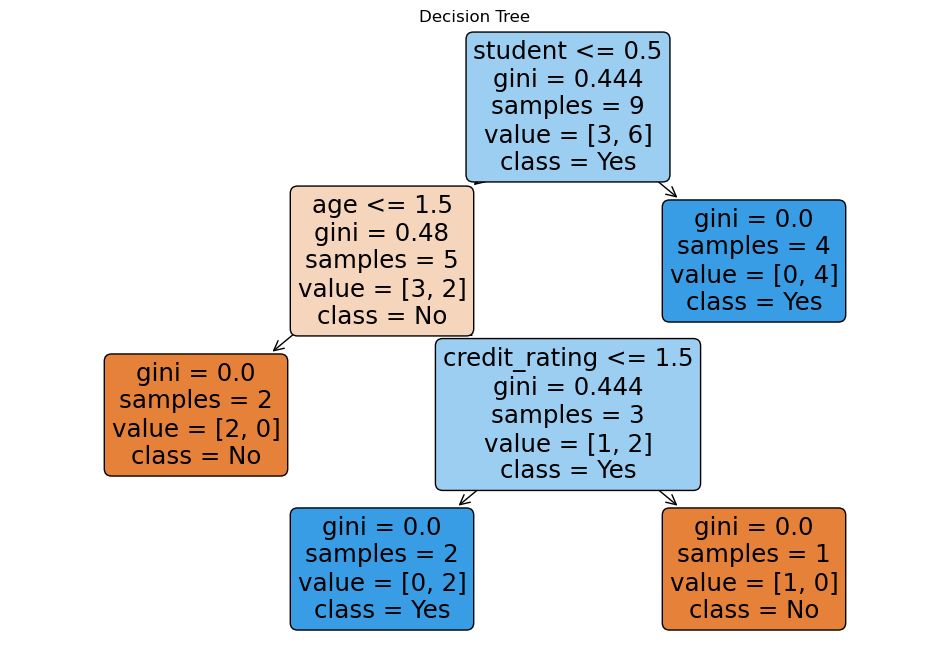

Tree Depth: 3
Confusion Matrix:
[[1 1]
 [1 2]]


In [1]:
# Importing necessary libraries
import numpy as np
import pandas as pd
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

# Step 1: Creating the dataset based on the lab instructions
data = {
    'age': ['<=30', '<=30', '31...40', '>40', '>40', '>40', '31...40', '<=30', '<=30', '>40', '<=30', '31...40', '31...40', '>40'],
    'income': ['high', 'high', 'high', 'medium', 'low', 'low', 'low', 'medium', 'low', 'medium', 'medium', 'medium', 'high', 'medium'],
    'student': ['no', 'no', 'no', 'no', 'yes', 'yes', 'yes', 'no', 'yes', 'yes', 'yes', 'no', 'yes', 'no'],
    'credit_rating': ['fair', 'excellent', 'fair', 'fair', 'fair', 'excellent', 'excellent', 'fair', 'fair', 'fair', 'excellent', 'excellent', 'fair', 'excellent'],
    'buys_computer': ['no', 'no', 'yes', 'yes', 'yes', 'no', 'yes', 'no', 'yes', 'yes', 'yes', 'yes', 'yes', 'no']
}

# Step 2: Convert the dataset into a DataFrame
df = pd.DataFrame(data)

# Step 3: Preprocessing - Convert categorical data into numeric data
df['age'] = df['age'].map({'<=30': 1, '31...40': 2, '>40': 3})
df['income'] = df['income'].map({'low': 1, 'medium': 2, 'high': 3})
df['student'] = df['student'].map({'no': 0, 'yes': 1})
df['credit_rating'] = df['credit_rating'].map({'fair': 1, 'excellent': 2})
df['buys_computer'] = df['buys_computer'].map({'no': 0, 'yes': 1})

# Step 4: Splitting the dataset into features (X) and labels (y)
X = df[['age', 'income', 'student', 'credit_rating']]
y = df['buys_computer']

# Step 5: Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Step 6: Creating a Decision Tree Classifier model
model = DecisionTreeClassifier(criterion='gini')  # You can change 'gini' to 'entropy' for entropy-based
model.fit(X_train, y_train)

# Step 7: Evaluating the model on training and test sets
train_accuracy = model.score(X_train, y_train)
test_accuracy = model.score(X_test, y_test)
print(f"Training Accuracy: {train_accuracy}")
print(f"Test Accuracy: {test_accuracy}")

# Step 8: Visualizing the Decision Tree
plt.figure(figsize=(12,8))
plot_tree(model, filled=True, feature_names=X.columns, class_names=['No', 'Yes'], rounded=True)
plt.title('Decision Tree')
plt.show()

# Step 9: Depth of the tree
tree_depth = model.get_depth()
print(f"Tree Depth: {tree_depth}")

# Step 10: Confusion Matrix for classification performance
from sklearn.metrics import confusion_matrix
y_pred = model.predict(X_test)
conf_matrix = confusion_matrix(y_test, y_pred)
print(f"Confusion Matrix:\n{conf_matrix}")
